## Proxy Validation: Pew (YouTube) vs Telco (Kaggle) 
- Purpose: Validate that Telco data can be used as proxy for YouTube analysis
- Data source: Pew Research (YouTube usage) vs Telco (Churn)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

df = pd.read_csv("../data/raw/telco_data.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            6293 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           6043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            4543 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   6043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       5543 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,4543.000000,5543.000000
mean,0.162147,32.546555,64.876403
std,0.368612,24.505519,30.101331
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.550000
75%,0.000000,56.000000,89.925000
max,1.000000,72.000000,118.600000


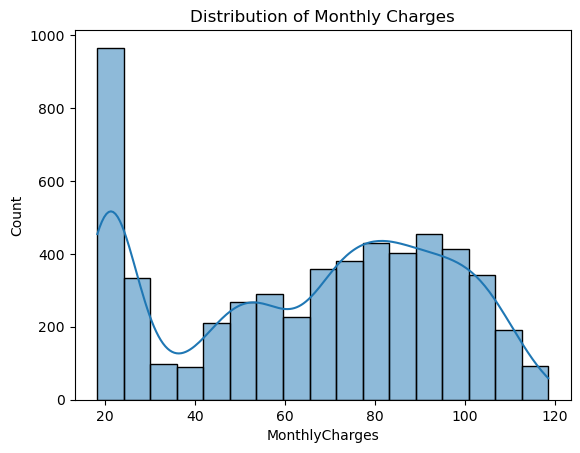

In [ ]:
# Verifying the way to choose Median

# Checking MonthlyCharges distribution
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Distribution of Monthly Charges')
plt.show()

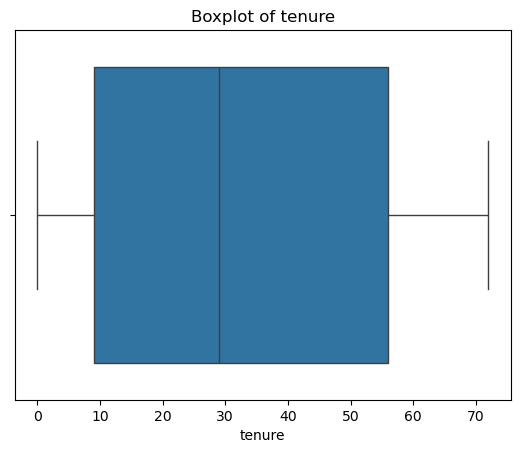

In [5]:
# Verifying tenure anomalies
sns.boxplot(x=df['tenure'])
plt.title('Boxplot of tenure')
plt.show()

In [ ]:
df.isnull().sum()

customerID             0
gender               750
SeniorCitizen          0
Partner             1000
Dependents             0
tenure              2500
PhoneService           0
MultipleLines          0
InternetService     1000
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV         1500
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges      1500
TotalCharges           0
Churn                  0
dtype: int64

In [ ]:
# Validation of "0" values for monthly charges
df[df['TotalCharges'] == 0].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,IncomeGroup


In [ ]:
# 0. Convert to numbers for Total Charges (NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 1. count missing values
print(df['TotalCharges'].isnull().sum())

# 2. Remove NaN
df = df.dropna(subset=['TotalCharges'])

11


In [ ]:
# 3. Confirm data type
print(df['TotalCharges'].dtype)

# 4. all
print(df['TotalCharges'].describe())

float64
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


## Churn rate group by Income  
SAME DIRECTION: Higher churn, High income --> Lower churn
- Pew(YouTube): Low (77) < Medium (84) < High (87)
- Telco: Low (60) < Medium (76) < High (83)


In [ ]:

# 1. Group by Monthly Charges
df['IncomeGroup'] = pd.qcut(df['TotalCharges'], 
                            q=3, # Low, Medium, High
                            labels=['Low', 'Medium', 'High'])

# 2. Churn rate for income group
pd.crosstab(df['IncomeGroup'], df['Churn'],
            margins=True, normalize='index').mul(100).round(2)

Churn,No,Yes
IncomeGroup,,
Low,60.49,39.51
Medium,76.28,23.72
High,83.49,16.51
All,73.42,26.58


## Gender
SAME DIRECTION: Women show lower engagement/higher churn
- Pew(YouTube): Women (83)  < Men (86)
- Telco churn: Women (73) >  Men (74)

In [ ]:
# Gender
pd.crosstab(df['gender'], df['Churn'], normalize='index').mul(100).round(2)

Churn,No,Yes
gender,,
Female,73.07,26.93
Male,74.00,26.00


## Age Group
- Pew YouTube usage - Ages 18-29 (95%) vs 65+ (64%) = 31% difference
- Telco: SeniorCitizen 0/1 comparison --> Older age expected lower churn

Strong Validated: 
- Pew(YouTube): Older = Lower (65+ 64%)
- Telco: Older = Lower (Senior 58.32%)

In [ ]:
# Age Group
pd.crosstab(df['SeniorCitizen'], df['Churn'], margins=True, normalize='index').mul(100).round(2)

Churn,No,Yes
SeniorCitizen,,
0,76.35,23.65
1,58.32,41.68
All,73.42,26.58
